### GBM Assignment

##### Below assignment is classification problem  where you have to predict chances of a Loan approval of a customer based on their demographics, past Credit history etc.The goal of the exercise is to train a model which is robust enough (i.e not an overfitted model) to predict Loan prediction in future. Model building process involves trying multiple iterations( tuning the Model hyperparameters) so that we get a better model form the previous iterations. In the below exercises some of the iterations by varying the Model hyperparametrs have been tried by our end and for some part you have to try the model building by tuning the other different parameters and see whether improves over the previous iterations or not

In [3]:
#Import libraries:

import pandas as pd

import numpy as np

from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm

from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV

#from sklearn.grid_search import    #Perforing grid search

import matplotlib.pylab as plt

from datetime import date

%matplotlib inline

from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 12, 4

import datetime

In [4]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # Use matplotlib.pyplot for plotting
from sklearn.ensemble import GradientBoostingClassifier  # GBM algorithm
from sklearn.model_selection import cross_val_score, GridSearchCV  # Updated for cross-validation and grid search
from sklearn import metrics  # For evaluation metrics
from datetime import datetime  # Use datetime instead of date for more functionality

# Set inline plotting for Jupyter Notebooks
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [6]:
%cd /Users/sriramkumar/Downloads/Assignment_ML

/Users/sriramkumar/Downloads/Assignment_ML


In [7]:
### Reading the train data

train=pd.read_csv("Train.csv",encoding = "ISO-8859-1")
test = pd.read_csv("Train.csv",encoding = "ISO-8859-1")

In [8]:
train.head()

,ID,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,...,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,LoggedIn,Disbursed
0,ID000002C20,Female,Delhi,20000,23-May-78,15-May-15,300000.0,5.0,0.0,CYBOSOL,...,NaN,NaN,NaN,N,Web-browser,G,S122,1,0,0
1,ID000004E40,Male,Mumbai,35000,07-Oct-85,04-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),...,13.25,NaN,6762.9,N,Web-browser,G,S122,3,0,0
2,ID000007H20,Male,Panchkula,22500,10-Oct-81,19-May-15,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,...,NaN,NaN,NaN,N,Web-browser,B,S143,1,0,0
3,ID000008I30,Male,Saharsa,35000,30-Nov-87,09-May-15,1000000.0,5.0,0.0,BIHAR GOVERNMENT,...,NaN,NaN,NaN,N,Web-browser,B,S143,3,0,0
4,ID000009J40,Male,Bengaluru,100000,17-Feb-84,20-May-15,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,...,NaN,NaN,NaN,N,Web-browser,B,S134,3,1,0


#### Questioins (i)

1. Drop City Varibale because of too many variables

2. Convert **DOB** to **Age** COLUMN and Drop **DOB** column

3. Create a **EMI_Loan_Submitted_Missing** which is 1 f EMI_Loan_Submitted is missing else 0, drop variable **EMI_Loan_Submitted** dropped

4. Drop **EmployerName** because of too many categories

5. IMpute **Existing_EMI** with 0 (median) since only 111 values ARE missing

6. Create **Interest_Rate_Missing** which is 1 if Interest_Rate was missing else 0 | Drop Original variable **Interest_Rate**

7. Drop **Lead_Creation_Date** because made little intuitive impact on outcome

8. Impute **Loan_Amount_Applied, Loan_Tenure_Applied** with median values

9. Create **Loan_Amount_Submitted_Missing** which is 1 if Loan_Amount_Submitted was missing else 0 , drop Original variable **Loan_Amount_Submitted**

10. Create **Loan_Tenure_Submitted_Missing** which is 1 if Loan_Tenure_Submitted was missing else 0, drop Original variable **Loan_Tenure_Submitted**

11. Drop **LoggedIn, Salary_Account**

12. Create **Processing_Fee_Missing** which is 1 if Processing_Fee was missing else 0, drop Original variable **Processing_Fee**

13. Source – top 2 kept as is and all others combined into different category

14. Perform Numerical and One-Hot-Coding

In [10]:
# Drop City Varibale because of too many variables

train.drop(["City"],axis=1,inplace=True)

test.drop(["City"],axis=1,inplace=True)

In [11]:
from datetime import datetime



train['DOB'] = pd.to_datetime(train['DOB'], format='%d-%b-%y')

mask = train['DOB'].apply(lambda x: x.year if pd.notnull(x) else 0) > 2024

cnt = mask.sum()

index = train.index[mask].tolist()



print(f"Number of invalid dates greater than 2024: {cnt}")

print(f"Indices of invalid dates greater than 2024: {index[:5]}")

print(train['DOB'][34], train['DOB'][89])

Number of invalid dates greater than 2024: 3851
Indices of invalid dates greater than 2024: [34, 58, 89, 92, 125]
2064-05-28 00:00:00 2068-04-01 00:00:00


In [12]:
train.loc[mask, 'DOB'] = train.loc[mask, 'DOB']- pd.DateOffset(years=100)

In [13]:
from datetime import datetime

current_data = datetime.now()

train['Age'] = train['DOB'].apply(lambda x: current_data.year - x.year - ((current_data.month, current_data.day) < (x.month, x.day)))

train.drop(columns=['DOB'], inplace=True)

train.head()

,ID,Gender,Monthly_Income,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,Mobile_Verified,...,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,LoggedIn,Disbursed,Age
0,ID000002C20,Female,20000,15-May-15,300000.0,5.0,0.0,CYBOSOL,HDFC Bank,N,...,NaN,NaN,N,Web-browser,G,S122,1,0,0,46
1,ID000004E40,Male,35000,04-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),ICICI Bank,Y,...,NaN,6762.9,N,Web-browser,G,S122,3,0,0,39
2,ID000007H20,Male,22500,19-May-15,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,State Bank of India,Y,...,NaN,NaN,N,Web-browser,B,S143,1,0,0,43
3,ID000008I30,Male,35000,09-May-15,1000000.0,5.0,0.0,BIHAR GOVERNMENT,State Bank of India,Y,...,NaN,NaN,N,Web-browser,B,S143,3,0,0,36
4,ID000009J40,Male,100000,20-May-15,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,HDFC Bank,Y,...,NaN,NaN,N,Web-browser,B,S134,3,1,0,40


In [14]:
print(train['Age'].min(), train['Age'].max())

9 95


In [15]:
from datetime import datetime



test['DOB'] = pd.to_datetime(test['DOB'], format='%d-%b-%y')

mask = test['DOB'].apply(lambda x: x.year if pd.notnull(x) else 0) > 2024

cnt = mask.sum()

index = test.index[mask].tolist()



print(f"Number of invalid dates greater than 2024: {cnt}")

print(f"Indices of invalid dates greater than 2024: {index[:5]}")

print(test['DOB'][34], test['DOB'][89])



test.loc[mask, 'DOB'] = test.loc[mask, 'DOB']- pd.DateOffset(years=100)



from datetime import datetime

current_data = datetime.now()

test['Age'] = test['DOB'].apply(lambda x: current_data.year - x.year - ((current_data.month, current_data.day) < (x.month, x.day)))

test.drop(columns=['DOB'], inplace=True)

test.head()

Number of invalid dates greater than 2024: 3851
Indices of invalid dates greater than 2024: [34, 58, 89, 92, 125]
2064-05-28 00:00:00 2068-04-01 00:00:00


,ID,Gender,Monthly_Income,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,Mobile_Verified,...,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,LoggedIn,Disbursed,Age
0,ID000002C20,Female,20000,15-May-15,300000.0,5.0,0.0,CYBOSOL,HDFC Bank,N,...,NaN,NaN,N,Web-browser,G,S122,1,0,0,46
1,ID000004E40,Male,35000,04-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),ICICI Bank,Y,...,NaN,6762.9,N,Web-browser,G,S122,3,0,0,39
2,ID000007H20,Male,22500,19-May-15,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,State Bank of India,Y,...,NaN,NaN,N,Web-browser,B,S143,1,0,0,43
3,ID000008I30,Male,35000,09-May-15,1000000.0,5.0,0.0,BIHAR GOVERNMENT,State Bank of India,Y,...,NaN,NaN,N,Web-browser,B,S143,3,0,0,36
4,ID000009J40,Male,100000,20-May-15,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,HDFC Bank,Y,...,NaN,NaN,N,Web-browser,B,S134,3,1,0,40


In [16]:
train['EMI_Loan_Submitted'].unique()

array([     nan,  6762.9 ,  6978.92, ..., 40259.  , 36278.14, 20811.58])

In [17]:
# Create a EMI_Loan_Submitted_Missing which is 1 f EMI_Loan_Submitted is missing else 0, drop variable EMI_Loan_Submitted dropped



train['EMI_Loan_Submitted_Missing'] = np.where(train['EMI_Loan_Submitted'].isnull(),1, 0)

train.drop(columns = ['EMI_Loan_Submitted'], inplace=True)



test['EMI_Loan_Submitted_Missing'] = np.where(test['EMI_Loan_Submitted'].isnull(),1, 0)

test.drop(columns = ['EMI_Loan_Submitted'], inplace=True)

In [18]:
train.head()

,ID,Gender,Monthly_Income,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,Mobile_Verified,...,Processing_Fee,Filled_Form,Device_Type,Var2,Source,Var4,LoggedIn,Disbursed,Age,EMI_Loan_Submitted_Missing
0,ID000002C20,Female,20000,15-May-15,300000.0,5.0,0.0,CYBOSOL,HDFC Bank,N,...,NaN,N,Web-browser,G,S122,1,0,0,46,1
1,ID000004E40,Male,35000,04-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),ICICI Bank,Y,...,NaN,N,Web-browser,G,S122,3,0,0,39,0
2,ID000007H20,Male,22500,19-May-15,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,State Bank of India,Y,...,NaN,N,Web-browser,B,S143,1,0,0,43,1
3,ID000008I30,Male,35000,09-May-15,1000000.0,5.0,0.0,BIHAR GOVERNMENT,State Bank of India,Y,...,NaN,N,Web-browser,B,S143,3,0,0,36,1
4,ID000009J40,Male,100000,20-May-15,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,HDFC Bank,Y,...,NaN,N,Web-browser,B,S134,3,1,0,40,1


In [19]:
# Drop EmployerName because of too many categories

train.drop(['Employer_Name'],axis = 1, inplace = True)

test.drop(['Employer_Name'],axis = 1, inplace = True)

In [20]:
## IMpute Existing_EMI with 0 (median) since only 111 values ARE missing

train['Existing_EMI'].fillna(0, inplace=True)

test['Existing_EMI'].fillna(0, inplace = True)

/var/folders/_j/wtwvw26x4bd2kjlsd0zlhp3w0000gp/T/ipykernel_45437/2358470522.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Existing_EMI'].fillna(0, inplace=True)
/var/folders/_j/wtwvw26x4bd2kjlsd0zlhp3w0000gp/T/ipykernel_45437/2358470522.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

In [21]:
train['Existing_EMI'].isnull().sum()

0

In [22]:
test['Existing_EMI'].isnull().sum()

0

In [23]:
train['Interest_Rate'].isnull().sum()

59294

In [24]:
train['Interest_Rate'].unique()

array([  nan, 13.25, 13.99, 14.85, 18.25, 20.  , 18.  , 15.5 , 19.  ,
       31.  , 16.75, 14.75, 24.  , 18.5 , 15.25, 32.5 , 15.75, 13.75,
       13.5 , 16.5 , 15.  , 23.5 , 13.49, 14.  , 13.  , 19.75, 15.35,
       14.99, 17.  , 15.99, 16.  , 17.5 , 16.25, 21.5 , 14.25, 12.99,
       14.5 , 25.5 , 29.5 , 27.  , 17.75, 14.8 , 27.5 , 28.5 , 15.49,
       14.3 , 14.49, 26.5 , 23.  , 19.05, 22.  , 18.4 , 16.35, 15.6 ,
       14.55, 15.8 , 14.29, 15.1 , 31.5 , 35.5 , 33.  , 37.  , 15.7 ,
       29.  , 28.  , 24.5 , 30.5 , 18.15, 16.2 , 11.99, 16.15, 15.15,
       14.9 , 20.5 ])

In [25]:
#Create Interest_Rate_Missing which is 1 if Interest_Rate was missing else 0 | Drop Original variable Interest_Rate

train['Interest_Rate_Missing'] = np.where(train['Interest_Rate'].isnull(), 1,0)

test['Interest_Rate_Missing'] = np.where(test['Interest_Rate'].isnull(), 1,0)



train.drop(columns = ['Interest_Rate'], inplace=True)

test.drop(columns = ['Interest_Rate'], inplace=True)

In [26]:
train.columns

Index(['ID', 'Gender', 'Monthly_Income', 'Lead_Creation_Date',
       'Loan_Amount_Applied', 'Loan_Tenure_Applied', 'Existing_EMI',
       'Salary_Account', 'Mobile_Verified', 'Var5', 'Var1',
       'Loan_Amount_Submitted', 'Loan_Tenure_Submitted', 'Processing_Fee',
       'Filled_Form', 'Device_Type', 'Var2', 'Source', 'Var4', 'LoggedIn',
       'Disbursed', 'Age', 'EMI_Loan_Submitted_Missing',
       'Interest_Rate_Missing'],
      dtype='object')

In [27]:
train.head()

,ID,Gender,Monthly_Income,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Salary_Account,Mobile_Verified,Var5,...,Filled_Form,Device_Type,Var2,Source,Var4,LoggedIn,Disbursed,Age,EMI_Loan_Submitted_Missing,Interest_Rate_Missing
0,ID000002C20,Female,20000,15-May-15,300000.0,5.0,0.0,HDFC Bank,N,0,...,N,Web-browser,G,S122,1,0,0,46,1,1
1,ID000004E40,Male,35000,04-May-15,200000.0,2.0,0.0,ICICI Bank,Y,13,...,N,Web-browser,G,S122,3,0,0,39,0,0
2,ID000007H20,Male,22500,19-May-15,600000.0,4.0,0.0,State Bank of India,Y,0,...,N,Web-browser,B,S143,1,0,0,43,1,1
3,ID000008I30,Male,35000,09-May-15,1000000.0,5.0,0.0,State Bank of India,Y,10,...,N,Web-browser,B,S143,3,0,0,36,1,1
4,ID000009J40,Male,100000,20-May-15,500000.0,2.0,25000.0,HDFC Bank,Y,17,...,N,Web-browser,B,S134,3,1,0,40,1,1


7. Drop **Lead_Creation_Date** because made little intuitive impact on outcome

8. Impute **Loan_Amount_Applied, Loan_Tenure_Applied** with median values

9. Create **Loan_Amount_Submitted_Missing** which is 1 if Loan_Amount_Submitted was missing else 0 , drop Original variable **Loan_Amount_Submitted**

10. Create **Loan_Tenure_Submitted_Missing** which is 1 if Loan_Tenure_Submitted was missing else 0, drop Original variable **Loan_Tenure_Submitted**

11. Drop **LoggedIn, Salary_Account**

12. Create **Processing_Fee_Missing** which is 1 if Processing_Fee was missing else 0, drop Original variable **Processing_Fee**

13. Source – top 2 kept as is and all others combined into different category

14. Perform Numerical and One-Hot-Coding

In [29]:
train.drop(columns= ['Lead_Creation_Date'], axis = 1, inplace= True)

test.drop(columns= ['Lead_Creation_Date'], axis = 1, inplace= True)

In [30]:
train['Loan_Amount_Applied'].isnull().sum(), test['Loan_Amount_Applied'].isnull().sum()

(71, 71)

In [31]:
train['Loan_Tenure_Applied'].isnull().sum(), test['Loan_Tenure_Applied'].isnull().sum()


(71, 71)

In [32]:
train['Loan_Tenure_Applied'].median(), test['Loan_Tenure_Applied'].median()

(2.0, 2.0)

In [33]:
## Impute Loan_Amount_Applied, Loan_Tenure_Applied with median values

train_median_Loan_Amount_Applied = train['Loan_Amount_Applied'].median()

test_median_Loan_Amount_Applied = test['Loan_Amount_Applied'].median()



train['Loan_Amount_Applied'].fillna(train_median_Loan_Amount_Applied, inplace = True)

test['Loan_Amount_Applied'].fillna(test_median_Loan_Amount_Applied, inplace = True)



train_median_Loan_Tenure_Applied = train['Loan_Tenure_Applied'].median()

test_median_Loan_Tenure_Applied = test['Loan_Tenure_Applied'].median()



train['Loan_Tenure_Applied'].fillna(train_median_Loan_Tenure_Applied, inplace = True)

test['Loan_Tenure_Applied'].fillna(test_median_Loan_Tenure_Applied, inplace = True)

/var/folders/_j/wtwvw26x4bd2kjlsd0zlhp3w0000gp/T/ipykernel_45437/3850920849.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Loan_Amount_Applied'].fillna(train_median_Loan_Amount_Applied, inplace = True)
/var/folders/_j/wtwvw26x4bd2kjlsd0zlhp3w0000gp/T/ipykernel_45437/3850920849.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate obje

In [34]:
train.head()

,ID,Gender,Monthly_Income,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Salary_Account,Mobile_Verified,Var5,Var1,...,Filled_Form,Device_Type,Var2,Source,Var4,LoggedIn,Disbursed,Age,EMI_Loan_Submitted_Missing,Interest_Rate_Missing
0,ID000002C20,Female,20000,300000.0,5.0,0.0,HDFC Bank,N,0,HBXX,...,N,Web-browser,G,S122,1,0,0,46,1,1
1,ID000004E40,Male,35000,200000.0,2.0,0.0,ICICI Bank,Y,13,HBXA,...,N,Web-browser,G,S122,3,0,0,39,0,0
2,ID000007H20,Male,22500,600000.0,4.0,0.0,State Bank of India,Y,0,HBXX,...,N,Web-browser,B,S143,1,0,0,43,1,1
3,ID000008I30,Male,35000,1000000.0,5.0,0.0,State Bank of India,Y,10,HBXX,...,N,Web-browser,B,S143,3,0,0,36,1,1
4,ID000009J40,Male,100000,500000.0,2.0,25000.0,HDFC Bank,Y,17,HBXX,...,N,Web-browser,B,S134,3,1,0,40,1,1


In [35]:
train.columns

Index(['ID', 'Gender', 'Monthly_Income', 'Loan_Amount_Applied',
       'Loan_Tenure_Applied', 'Existing_EMI', 'Salary_Account',
       'Mobile_Verified', 'Var5', 'Var1', 'Loan_Amount_Submitted',
       'Loan_Tenure_Submitted', 'Processing_Fee', 'Filled_Form', 'Device_Type',
       'Var2', 'Source', 'Var4', 'LoggedIn', 'Disbursed', 'Age',
       'EMI_Loan_Submitted_Missing', 'Interest_Rate_Missing'],
      dtype='object')

9. Create **Loan_Amount_Submitted_Missing** which is 1 if Loan_Amount_Submitted was missing else 0 , drop Original variable **Loan_Amount_Submitted**

10. Create **Loan_Tenure_Submitted_Missing** which is 1 if Loan_Tenure_Submitted was missing else 0, drop Original variable **Loan_Tenure_Submitted**

11. Drop **LoggedIn, Salary_Account**

12. Create **Processing_Fee_Missing** which is 1 if Processing_Fee was missing else 0, drop Original variable **Processing_Fee**

13. Source – top 2 kept as is and all others combined into different category

14. Perform Numerical and One-Hot-Coding

In [37]:
train['Loan_Amount_Submitted'].isnull().sum(), test['Loan_Amount_Submitted'].isnull().sum()

(34613, 34613)

In [38]:
#Create **Loan_Amount_Submitted_Missing** which is 1 if Loan_Amount_Submitted was missing else 0 , drop Original variable **Loan_Amount_Submitted**



train['Loan_Amount_Submitted_Missing'] = np.where(train['Loan_Amount_Submitted'].isnull(), 1,0)

test['Loan_Amount_Submitted_Missing'] = np.where(test['Loan_Amount_Submitted'].isnull(), 1,0)

train.drop(columns = ['Loan_Amount_Submitted'], axis = 1, inplace = True)

test.drop(columns = ['Loan_Amount_Submitted'], axis = 1, inplace = True)

In [39]:
train.columns

Index(['ID', 'Gender', 'Monthly_Income', 'Loan_Amount_Applied',
       'Loan_Tenure_Applied', 'Existing_EMI', 'Salary_Account',
       'Mobile_Verified', 'Var5', 'Var1', 'Loan_Tenure_Submitted',
       'Processing_Fee', 'Filled_Form', 'Device_Type', 'Var2', 'Source',
       'Var4', 'LoggedIn', 'Disbursed', 'Age', 'EMI_Loan_Submitted_Missing',
       'Interest_Rate_Missing', 'Loan_Amount_Submitted_Missing'],
      dtype='object')

In [40]:
train['Loan_Tenure_Submitted'].isnull().sum(), test['Loan_Tenure_Submitted'].isnull().sum()

(34613, 34613)

In [41]:
# Create Loan_Tenure_Submitted_Missing which is 1 if Loan_Tenure_Submitted was missing else 0, drop Original variable Loan_Tenure_Submitted



train['Loan_Tenure_Submitted_Missing'] = np.where(train['Loan_Tenure_Submitted'].isnull(), 1,0)

test['Loan_Tenure_Submitted_Missing'] = np.where(test['Loan_Tenure_Submitted'].isnull(), 1,0)



train.drop(columns = ['Loan_Tenure_Submitted'], axis = 1, inplace = True)

test.drop(columns = ['Loan_Tenure_Submitted'], axis = 1, inplace = True)


In [42]:
train.columns

Index(['ID', 'Gender', 'Monthly_Income', 'Loan_Amount_Applied',
       'Loan_Tenure_Applied', 'Existing_EMI', 'Salary_Account',
       'Mobile_Verified', 'Var5', 'Var1', 'Processing_Fee', 'Filled_Form',
       'Device_Type', 'Var2', 'Source', 'Var4', 'LoggedIn', 'Disbursed', 'Age',
       'EMI_Loan_Submitted_Missing', 'Interest_Rate_Missing',
       'Loan_Amount_Submitted_Missing', 'Loan_Tenure_Submitted_Missing'],
      dtype='object')

In [43]:
test.columns

Index(['ID', 'Gender', 'Monthly_Income', 'Loan_Amount_Applied',
       'Loan_Tenure_Applied', 'Existing_EMI', 'Salary_Account',
       'Mobile_Verified', 'Var5', 'Var1', 'Processing_Fee', 'Filled_Form',
       'Device_Type', 'Var2', 'Source', 'Var4', 'LoggedIn', 'Disbursed', 'Age',
       'EMI_Loan_Submitted_Missing', 'Interest_Rate_Missing',
       'Loan_Amount_Submitted_Missing', 'Loan_Tenure_Submitted_Missing'],
      dtype='object')

In [44]:
train = pd.get_dummies(train, columns=['Salary_Account'], drop_first=True)
test = pd.get_dummies(test, columns=['Salary_Account'], drop_first=True)


In [45]:
test.columns

Index(['ID', 'Gender', 'Monthly_Income', 'Loan_Amount_Applied',
       'Loan_Tenure_Applied', 'Existing_EMI', 'Mobile_Verified', 'Var5',
       'Var1', 'Processing_Fee', 'Filled_Form', 'Device_Type', 'Var2',
       'Source', 'Var4', 'LoggedIn', 'Disbursed', 'Age',
       'EMI_Loan_Submitted_Missing', 'Interest_Rate_Missing',
       'Loan_Amount_Submitted_Missing', 'Loan_Tenure_Submitted_Missing',
       'Salary_Account_Allahabad Bank', 'Salary_Account_Andhra Bank',
       'Salary_Account_Axis Bank', 'Salary_Account_B N P Paribas',
       'Salary_Account_Bank of Baroda', 'Salary_Account_Bank of India',
       'Salary_Account_Bank of Maharasthra',
       'Salary_Account_Bank of Rajasthan', 'Salary_Account_Canara Bank',
       'Salary_Account_Catholic Syrian Bank',
       'Salary_Account_Central Bank of India', 'Salary_Account_Citibank',
       'Salary_Account_Corporation bank', 'Salary_Account_Dena Bank',
       'Salary_Account_Deutsche Bank', 'Salary_Account_Dhanalakshmi Bank Ltd',
    

In [46]:
## Create Processing_Fee_Missing which is 1 if Processing_Fee was missing else 0, drop Original variable Processing_Fee



train['Processing_Fee_Missing'] = np.where(train['Processing_Fee'].isnull(), 1, 0)

test['Processing_Fee_Missing'] = np.where(test['Processing_Fee'].isnull(), 1, 0)



train.drop(columns = ['Processing_Fee'], axis = 1, inplace = True)

test.drop(columns = ['Processing_Fee'], axis = 1, inplace = True)


In [47]:
#Source – top 2 kept as is and all others combined into different category

top_2_sources = train['Source'].value_counts()[:2].index

train['Source'] = np.where(train['Source'].isin(top_2_sources), train['Source'], 'Other')

test['Source'] = np.where(test['Source'].isin(top_2_sources), test['Source'], 'Other')

In [48]:
train['Source'].value_counts()[:2].index

Index(['S122', 'S133'], dtype='object', name='Source')

In [49]:
##Perform Numerical and One-Hot-Coding


In [50]:
for col in train.columns:

    if train[col].dtype == 'object':

        print(f'Unique values of {col} : {train[col].unique()}')



print('\n')

print("="*80)

print('\n')

for col in test.columns:

    if test[col].dtype == 'object':

        print(f'Unique values of {col} : {test[col].unique()}')

Unique values of ID : ['ID000002C20' 'ID000004E40' 'ID000007H20' ... 'ID124816Q10' 'ID124818S30'
 'ID124821V10']
Unique values of Gender : ['Female' 'Male']
Unique values of Mobile_Verified : ['N' 'Y']
Unique values of Var1 : ['HBXX' 'HBXA' 'HAXM' 'HAXB' 'HBXC' 'HBXD' 'HBXH' 'HAXA' 'HBXB' 'HAYT'
 'HCXD' 'HVYS' 'HAVC' 'HCXG' 'HAZD' 'HCYS' 'HCXF' 'HAXC' 'HAXF']
Unique values of Filled_Form : ['N' 'Y']
Unique values of Device_Type : ['Web-browser' 'Mobile']
Unique values of Var2 : ['G' 'B' 'C' 'E' 'F' 'D' 'A']
Unique values of Source : ['S122' 'Other' 'S133']




Unique values of ID : ['ID000002C20' 'ID000004E40' 'ID000007H20' ... 'ID124816Q10' 'ID124818S30'
 'ID124821V10']
Unique values of Gender : ['Female' 'Male']
Unique values of Mobile_Verified : ['N' 'Y']
Unique values of Var1 : ['HBXX' 'HBXA' 'HAXM' 'HAXB' 'HBXC' 'HBXD' 'HBXH' 'HAXA' 'HBXB' 'HAYT'
 'HCXD' 'HVYS' 'HAVC' 'HCXG' 'HAZD' 'HCYS' 'HCXF' 'HAXC' 'HAXF']
Unique values of Filled_Form : ['N' 'Y']
Unique values of Device_Type :

In [51]:
## Encoding time

train['Gender'] = train['Gender'].map({'Male':0, 'Female':1})

test['Gender'] = test['Gender'].map({'Male':0, 'Female':1})



train['Mobile_Verified'] = train['Mobile_Verified'].map({'Y':1, 'N':0})

test['Mobile_Verified'] = test['Mobile_Verified'].map({'Y':1, 'N':0})



train['Filled_Form'] = train['Filled_Form'].map({'Y':1, 'N':0})

test['Filled_Form'] = test['Filled_Form'].map({'Y':1, 'N':0})



train['Device_Type'] = train['Device_Type'].map({'Web-browser': 0, 'Mobile': 1})

test['Device_Type'] = test['Device_Type'].map({'Web-browser': 0, 'Mobile': 1})



dummies = ['Source', 'Var1', 'Var2']

train = pd.get_dummies(train, columns=dummies, drop_first=True)

test = pd.get_dummies(test, columns=dummies, drop_first=True)

In [52]:
train.isnull().sum()

ID                     0
Gender                 0
Monthly_Income         0
Loan_Amount_Applied    0
Loan_Tenure_Applied    0
                      ..
Var2_C                 0
Var2_D                 0
Var2_E                 0
Var2_F                 0
Var2_G                 0
Length: 101, dtype: int64

In [53]:
train = train.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

test = test.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

In [54]:
train.head()

,ID,Gender,Monthly_Income,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Mobile_Verified,Var5,Filled_Form,Device_Type,...,Var1_HCXF,Var1_HCXG,Var1_HCYS,Var1_HVYS,Var2_B,Var2_C,Var2_D,Var2_E,Var2_F,Var2_G
0,ID000002C20,1,20000,300000.0,5.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,ID000004E40,0,35000,200000.0,2.0,0.0,1,13,0,0,...,0,0,0,0,0,0,0,0,0,1
2,ID000007H20,0,22500,600000.0,4.0,0.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,ID000008I30,0,35000,1000000.0,5.0,0.0,1,10,0,0,...,0,0,0,0,1,0,0,0,0,0
4,ID000009J40,0,100000,500000.0,2.0,25000.0,1,17,0,0,...,0,0,0,0,1,0,0,0,0,0


In [55]:
train.drop(columns = ['ID'], axis = 1, inplace = True)

test.drop(columns = ['ID'], axis = 1, inplace = True)

In [56]:
y = train['Disbursed']
x = train.drop('Disbursed', axis = 1)

In [57]:
from sklearn.preprocessing import StandardScaler
scaller = StandardScaler()
scaled_data = scaller.fit_transform(x)

In [58]:
from sklearn.preprocessing import StandardScaler
scaller = StandardScaler()
scaled_data1 = scaller.fit_transform(test)

In [59]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(scaled_data)

PCA()

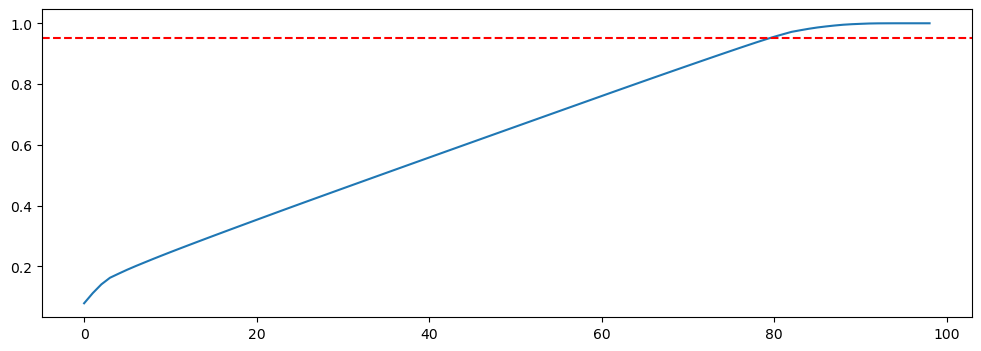

In [60]:
variance_ratio = pca.explained_variance_ratio_
plt.plot(np.cumsum(variance_ratio))
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance') 
plt.show()

In [61]:
## i am gonna take number of component = 76 
pca = PCA(n_components = 76, random_state = 42)

In [62]:
pca_data = pca.fit_transform(scaled_data)

In [63]:
train['Disbursed']

0        0
1        0
2        0
3        0
4        0
        ..
87015    0
87016    0
87017    0
87018    0
87019    0
Name: Disbursed, Length: 87020, dtype: int64

In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test,  y_train, y_test = train_test_split(pca_data,y, test_size = 0.2, random_state = 42)

### Creating a base gbm model

In [66]:
test.columns

Index(['Gender', 'Monthly_Income', 'Loan_Amount_Applied',
       'Loan_Tenure_Applied', 'Existing_EMI', 'Mobile_Verified', 'Var5',
       'Filled_Form', 'Device_Type', 'Var4', 'LoggedIn', 'Disbursed', 'Age',
       'EMI_Loan_Submitted_Missing', 'Interest_Rate_Missing',
       'Loan_Amount_Submitted_Missing', 'Loan_Tenure_Submitted_Missing',
       'Salary_Account_Allahabad Bank', 'Salary_Account_Andhra Bank',
       'Salary_Account_Axis Bank', 'Salary_Account_B N P Paribas',
       'Salary_Account_Bank of Baroda', 'Salary_Account_Bank of India',
       'Salary_Account_Bank of Maharasthra',
       'Salary_Account_Bank of Rajasthan', 'Salary_Account_Canara Bank',
       'Salary_Account_Catholic Syrian Bank',
       'Salary_Account_Central Bank of India', 'Salary_Account_Citibank',
       'Salary_Account_Corporation bank', 'Salary_Account_Dena Bank',
       'Salary_Account_Deutsche Bank', 'Salary_Account_Dhanalakshmi Bank Ltd',
       'Salary_Account_Federal Bank', 'Salary_Account_Firstra

In [67]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, roc_auc_score

from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score


In [68]:
#### Creating datatset with Dependent and indepent varaibles

Dependent=train["Disbursed"]

IndependentCols=train.columns.values[np.invert (pd.Series(train.columns.values).isin(["Disbursed","ID"]))]

Independent=train[IndependentCols]

x_train, x_test, y_train, y_test = train_test_split(Independent, Dependent, test_size=0.3, random_state=10)

In [69]:
x_train.shape, y_train.shape

((60914, 99), (60914,))

In [70]:
x_train = pd.DataFrame(x_train)

x_test = pd.DataFrame(x_test)

In [71]:
## fitting a base gbm model

gbm0 = GradientBoostingClassifier(random_state=10) ## initialising base gbm model

gbm0.fit(x_train, y_train)

GradientBoostingClassifier(random_state=10)

#### Question (ii)

##### For the above baase model built, calculate and

##### (i) print  accuracy

##### (ii) print auc

##### (iii) create the 5 fold cross validation on auc score, calculate the mean,std dev, min and max of all the 5 folds

##### (iii) print feature importance in ascending order and plot it

In [73]:
x_test.columns

Index(['Gender', 'Monthly_Income', 'Loan_Amount_Applied',
       'Loan_Tenure_Applied', 'Existing_EMI', 'Mobile_Verified', 'Var5',
       'Filled_Form', 'Device_Type', 'Var4', 'LoggedIn', 'Age',
       'EMI_Loan_Submitted_Missing', 'Interest_Rate_Missing',
       'Loan_Amount_Submitted_Missing', 'Loan_Tenure_Submitted_Missing',
       'Salary_Account_Allahabad Bank', 'Salary_Account_Andhra Bank',
       'Salary_Account_Axis Bank', 'Salary_Account_B N P Paribas',
       'Salary_Account_Bank of Baroda', 'Salary_Account_Bank of India',
       'Salary_Account_Bank of Maharasthra',
       'Salary_Account_Bank of Rajasthan', 'Salary_Account_Canara Bank',
       'Salary_Account_Catholic Syrian Bank',
       'Salary_Account_Central Bank of India', 'Salary_Account_Citibank',
       'Salary_Account_Corporation bank', 'Salary_Account_Dena Bank',
       'Salary_Account_Deutsche Bank', 'Salary_Account_Dhanalakshmi Bank Ltd',
       'Salary_Account_Federal Bank', 'Salary_Account_Firstrand Bank Limit

In [74]:
x_train.columns

Index(['Gender', 'Monthly_Income', 'Loan_Amount_Applied',
       'Loan_Tenure_Applied', 'Existing_EMI', 'Mobile_Verified', 'Var5',
       'Filled_Form', 'Device_Type', 'Var4', 'LoggedIn', 'Age',
       'EMI_Loan_Submitted_Missing', 'Interest_Rate_Missing',
       'Loan_Amount_Submitted_Missing', 'Loan_Tenure_Submitted_Missing',
       'Salary_Account_Allahabad Bank', 'Salary_Account_Andhra Bank',
       'Salary_Account_Axis Bank', 'Salary_Account_B N P Paribas',
       'Salary_Account_Bank of Baroda', 'Salary_Account_Bank of India',
       'Salary_Account_Bank of Maharasthra',
       'Salary_Account_Bank of Rajasthan', 'Salary_Account_Canara Bank',
       'Salary_Account_Catholic Syrian Bank',
       'Salary_Account_Central Bank of India', 'Salary_Account_Citibank',
       'Salary_Account_Corporation bank', 'Salary_Account_Dena Bank',
       'Salary_Account_Deutsche Bank', 'Salary_Account_Dhanalakshmi Bank Ltd',
       'Salary_Account_Federal Bank', 'Salary_Account_Firstrand Bank Limit

In [76]:
test.shape

(87020, 100)

In [80]:
y_pred_train = gbm0.predict(x_train)

y_pred_test = gbm0.predict(x_test)

In [82]:
#### Write your code here

accuracy_train = accuracy_score(y_train, y_pred_train)

accuracy_test = accuracy_score(y_test, y_pred_test)

roc_auc_score_train = roc_auc_score(y_train, y_pred_train)

roc_auc_score_test = roc_auc_score(y_test, y_pred_test)



print(f'Accuracy for train data : {accuracy_train}')

print(f'Accuracy for test data : {accuracy_test}')



print(f'roc_auc_score for train data : {roc_auc_score_train}')

print(f'roc_auc_score for test data : {roc_auc_score_test}')


Accuracy for train data : 0.9900351314968644
Accuracy for test data : 0.9888148318394239
roc_auc_score for train data : 0.8434977282547305
roc_auc_score for test data : 0.8166942597273041


5-Fold CV AUC: Mean=0.9916, Std Dev=0.0012, Min=0.9897, Max=0.9933

Feature Importance (Ascending Order):
                                      Feature  Importance
23           Salary_Account_Bank of Rajasthan    0.000000
69        Salary_Account_United Bank of India    0.000000
25        Salary_Account_Catholic Syrian Bank    0.000000
26       Salary_Account_Central Bank of India    0.000000
65  Salary_Account_Tamil Nadu Mercantile Bank    0.000000
..                                        ...         ...
6                                        Var5    0.017375
2                         Loan_Amount_Applied    0.019405
4                                Existing_EMI    0.029505
1                              Monthly_Income    0.063474
10                                   LoggedIn    0.789537

[99 rows x 2 columns]




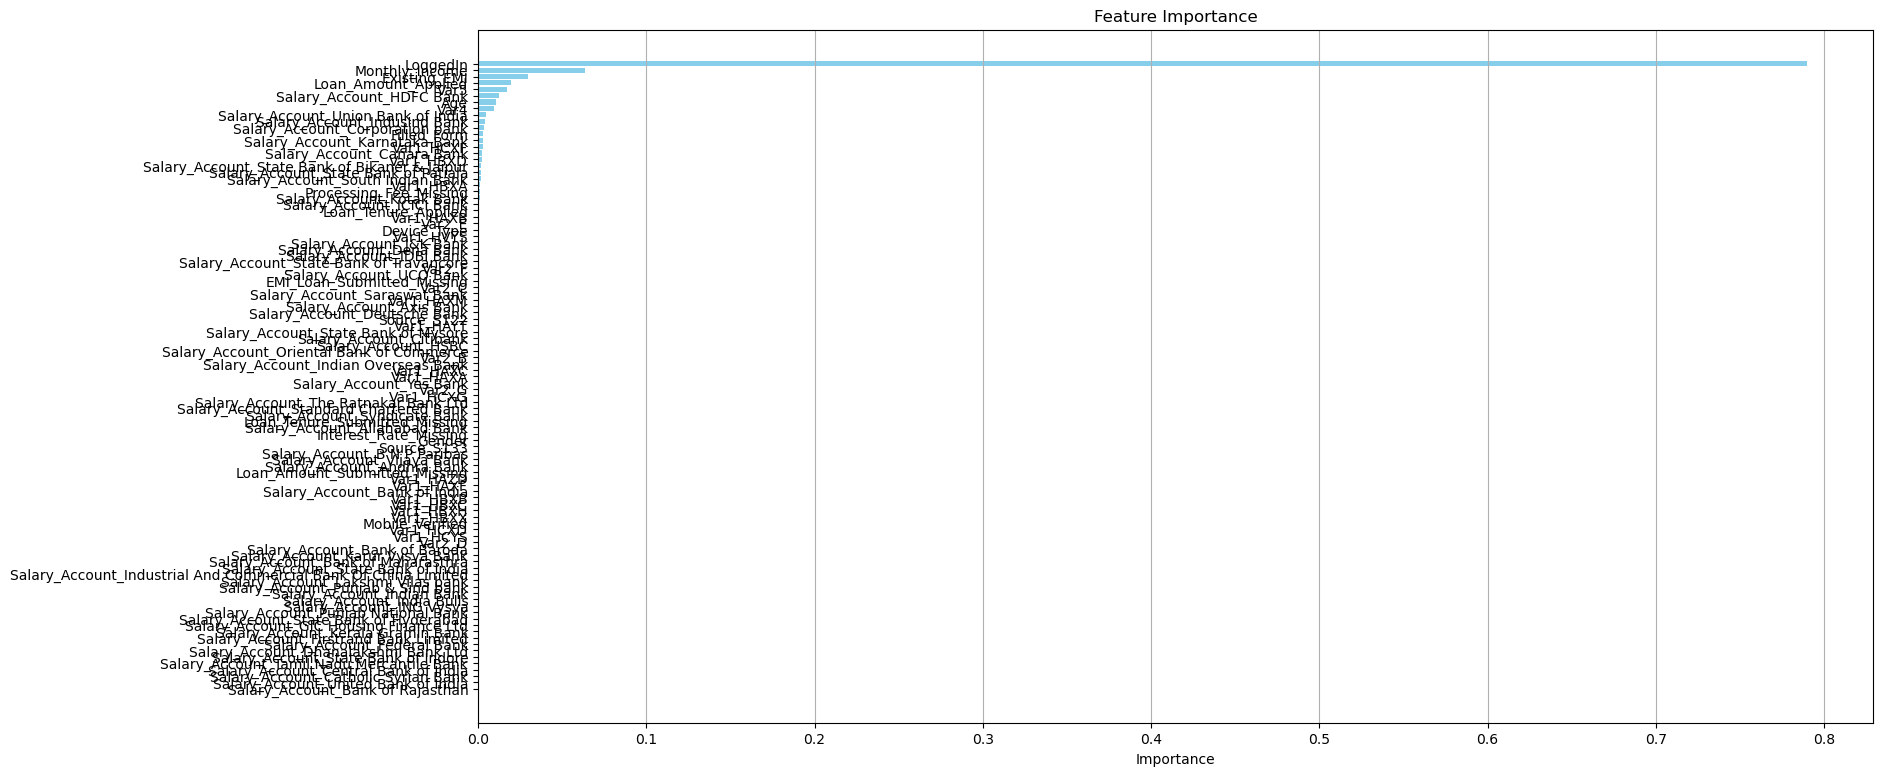

In [84]:
#create the 5 fold cross validation on auc score, calculate the mean,std dev, min and max of all the 5 folds

kf = KFold(n_splits=5, shuffle=True, random_state=10)

cv_scores = cross_val_score(gbm0, x_train, y_train, cv=kf, scoring='roc_auc')



mean_cv = np.mean(cv_scores)

std_cv = np.std(cv_scores)

min_cv = np.min(cv_scores)

max_cv = np.max(cv_scores)



print(f"5-Fold CV AUC: Mean={mean_cv:.4f}, Std Dev={std_cv:.4f}, Min={min_cv:.4f}, Max={max_cv:.4f}")



# (iv) Print feature importance in ascending order and plot it

importance = gbm0.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': importance})

feature_importance_df.sort_values(by='Importance', ascending=True, inplace=True)



print("\nFeature Importance (Ascending Order):")

print(feature_importance_df)



print('\n')

# Plot feature importance

plt.figure(figsize=(18, 9))

plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')

plt.xlabel('Importance')

plt.title('Feature Importance')

plt.grid(axis='x')

plt.show()

In [86]:
### Creating Models by  tuning n_estimators  by varying from its values from 20 to 80 in steps of 10

param_test1 = {'n_estimators': np.arange(20,81,10)}

gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10),

param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)

gsearch1.fit(x_train,y_train)

gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([0.49624467, 0.70769396, 0.96030455, 1.29959922, 1.47296424,
         1.89119325, 1.90164948]),
  'std_fit_time': array([0.0108846 , 0.01227122, 0.01331244, 0.03727859, 0.02362588,
         0.08956175, 0.12666392]),
  'mean_score_time': array([0.03131304, 0.01883688, 0.02214828, 0.02657318, 0.03129239,
         0.03291912, 0.03122935]),
  'std_score_time': array([0.01334244, 0.00043777, 0.00049661, 0.00092633, 0.00450396,
         0.00133745, 0.00412265]),
  'param_n_estimators': masked_array(data=[20, 30, 40, 50, 60, 70, 80],
               mask=[False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 20},
   {'n_estimators': 30},
   {'n_estimators': 40},
   {'n_estimators': 50},
   {'n_estimators': 60},
   {'n_estimators': 70},
   {'n_estimators': 80}],
  'split0_test_score': array([0.98873001, 0.9882393 , 0.98813734, 0.98849317, 0.98896731,
         0.98859444, 0.98944789]),
  'spl

In [87]:
gsearch1.best_params_

{'n_estimators': 70}

#### Question (iii)

#####  Tune the model with parameters  max_depth and min_samples_split

##### from above take the n_estimators with max mean AUC on cv sample and use it for tuning the model on two parameters below

##### (i) max depth varying from 5 and 15 in steps of 2

##### (ii) min_samples_split varying from 200 and 1000 in steps of 200

##### store the output of tuned model in object "gsearch2"

In [88]:

best_n_estimators = gsearch1.best_params_['n_estimators']

param_grid = {

    'max_depth': list(range(5, 16, 2)),  # 5, 7, 9, 11, 13, 15

    'min_samples_split': list(range(200, 1001, 200))  # 200, 400, 600, 800, 1000

}



gsearch2 = GridSearchCV(

    estimator=GradientBoostingClassifier(n_estimators=best_n_estimators, random_state=10),

    param_grid=param_grid,

    scoring='roc_auc',

    cv=5,

    n_jobs=-1,

    verbose=1

)

gsearch2.fit(x_train,y_train)

best_params_gsearch2 = gsearch2.best_params_

best_score_gsearch2 = gsearch2.best_score_



print(f"Best Parameters from gsearch2: {best_params_gsearch2}")

print(f"Best AUC Score from gsearch2: {best_score_gsearch2:.4f}") 

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters from gsearch2: {'max_depth': 5, 'min_samples_split': 800}
Best AUC Score from gsearch2: 0.9913


In [92]:
## Tuning the Model with best max depth from above and varying

## (i)min_samples_split':range(1000,2100,200),

## (i)'min_samples_leaf':range(30,71,10)



param_test3 = {'min_samples_split':np.arange(1000,2100,200), 'min_samples_leaf':np.arange(30,71,10)}

gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=gsearch1.best_params_['n_estimators'],max_depth=gsearch2.best_params_['max_depth'],max_features='sqrt', subsample=0.8, random_state=10),

param_grid = param_test3, scoring='roc_auc',n_jobs=4, cv=5)

gsearch3.fit(x_train,y_train)

gsearch3.best_params_, gsearch3.best_score_

({'min_samples_leaf': 60, 'min_samples_split': 1600}, 0.9903383761801926)

In [94]:
gsearch3.best_params_

{'min_samples_leaf': 60, 'min_samples_split': 1600}

#### Question (iv)

###### Tune the Model with "max_features" parameter by trying  values from 7 to 19 in steps of 2, take the best parameter of "min_samples_split" and "min_samples_leaf"  which gives best auc on cv sample from above, create the gsearch obejct with name **gsearch4**

In [97]:
best_min_samples_split = gsearch3.best_params_['min_samples_split']

best_min_samples_leaf = gsearch3.best_params_['min_samples_leaf']



# (iv) Tuning the model with max_features

param_test4 = {'max_features': np.arange(7, 20, 2)}  # 7, 9, 11, 13, 15, 17, 19

gsearch4 = GridSearchCV(

    estimator=GradientBoostingClassifier(

        learning_rate=0.1,

        n_estimators=gsearch1.best_params_['n_estimators'],

        max_depth=gsearch2.best_params_['max_depth'],

        min_samples_split=best_min_samples_split,

        min_samples_leaf=best_min_samples_leaf,

        subsample=0.8,  # default value; will be tuned later

        random_state=10

    ),

    param_grid=param_test4,

    scoring='roc_auc',

    n_jobs=-1,

    cv=5,

    verbose=1

)

gsearch4.fit(x_train, y_train)



best_params_gsearch4 = gsearch4.best_params_

best_score_gsearch4 = gsearch4.best_score_



print(f"Best Parameters from gsearch4: {best_params_gsearch4}")

print(f"Best AUC Score from gsearch4: {best_score_gsearch4:.4f}")

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Parameters from gsearch4: {'max_features': 13}
Best AUC Score from gsearch4: 0.9918


#### Question (v)

###### Tune the Model with the "subsample" parameter  by trying  values [0.6,0.7,0.75,0.8,0.85,0.9], taking the other opttimum features from above ,create the gsearch obejct with name **gsearch5**

In [100]:
param_test5 = {'subsample': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9]}  # Subsample values

gsearch5 = GridSearchCV(

    estimator=GradientBoostingClassifier(

        learning_rate=0.1,

        n_estimators=gsearch1.best_params_['n_estimators'],

        max_depth=gsearch2.best_params_['max_depth'],

        min_samples_split=best_min_samples_split,

        min_samples_leaf=best_min_samples_leaf,

        max_features=gsearch4.best_params_['max_features'],  # Use best max_features

        random_state=10

    ),

    param_grid=param_test5,

    scoring='roc_auc',

    n_jobs= -1,

    cv=5,

    verbose=1

)

gsearch5.fit(x_train, y_train)



best_params_gsearch5 = gsearch5.best_params_

best_score_gsearch5 = gsearch5.best_score_



print(f"Best Parameters from gsearch5: {best_params_gsearch5}")

print(f"Best AUC Score from gsearch5: {best_score_gsearch5:.4f}")

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters from gsearch5: {'subsample': 0.85}
Best AUC Score from gsearch5: 0.9919


##### Question (vi)

###### Create a gbm Model "gbm_tuned1","gbm_tuned2" ,"gbm_tuned3" by tuning the above model by taking the best subsample by  

###### (i)decreasing the learning rate to half, i.e. 0.05, with twice the number of trees.

###### (ii)decreasing the learning rate to 1/20, i.e. 0.02, with 10 times number of trees.

###### (iii)decreasing the learning rate to 1/20, i.e. 0.005, with 20 times number of trees.

###### (iv) choose the model with leat average AUC on cross validation

###### (v) use the model selected in step (iv) and score the test data




In [103]:
best_subsample = gsearch5.best_params_['subsample']



#(i) Model 1: Learning rate 0.05 with twice the number of trees

gbm_tuned1 = GradientBoostingClassifier(

    learning_rate=0.05,

    n_estimators=gsearch1.best_params_['n_estimators'] * 2,  # double the trees

    max_depth=gsearch2.best_params_['max_depth'],

    min_samples_split=gsearch3.best_params_['min_samples_split'],

    min_samples_leaf=gsearch3.best_params_['min_samples_leaf'],

    max_features=gsearch4.best_params_['max_features'],

    subsample=best_subsample,

    random_state=10

)



#(ii) Model 2: Learning rate 0.02 with ten times the number of trees

gbm_tuned2 = GradientBoostingClassifier(

    learning_rate=0.02,

    n_estimators=gsearch1.best_params_['n_estimators'] * 10,  # ten times the trees

    max_depth=gsearch2.best_params_['max_depth'],

    min_samples_split=gsearch3.best_params_['min_samples_split'],

    min_samples_leaf=gsearch3.best_params_['min_samples_leaf'],

    max_features=gsearch4.best_params_['max_features'],

    subsample=best_subsample,

    random_state=10

)



# (iii) Model 3: Learning rate 0.005 with twenty times the number of trees

gbm_tuned3 = GradientBoostingClassifier(

    learning_rate=0.005,

    n_estimators=gsearch1.best_params_['n_estimators'] * 20,  # twenty times the trees

    max_depth=gsearch2.best_params_['max_depth'],

    min_samples_split=gsearch3.best_params_['min_samples_split'],

    min_samples_leaf=gsearch3.best_params_['min_samples_leaf'],

    max_features=gsearch4.best_params_['max_features'],

    subsample=best_subsample,

    random_state=10

)



# List to hold models and their AUC scores

models = [gbm_tuned1, gbm_tuned2, gbm_tuned3]

model_names = ['gbm_tuned1', 'gbm_tuned2', 'gbm_tuned3']

auc_scores = []



# (iv) Evaluate models using cross-validation

for model in models:

    cv_scores = cross_val_score(model, x_train, y_train, scoring='roc_auc', cv=5)

    mean_auc = np.mean(cv_scores)

    auc_scores.append(mean_auc)

    print(f"{model_names.pop(0)}: Mean AUC = {mean_auc:.4f}")



# Select the model with the least average AUC

best_model_index = np.argmin(auc_scores)

best_model = models[best_model_index]

best_model_name = f"gbm_tuned{best_model_index + 1}"



print(f"\nSelected Model: {best_model_name} with Mean AUC = {auc_scores[best_model_index]:.4f}")



# (v) Score the selected model on the test data

best_model.fit(x_train, y_train)

y_test_pred_prob = best_model.predict_proba(x_test)[:, 1]  # Assuming x_test is your test dataset

test_auc = roc_auc_score(y_test, y_test_pred_prob)  # Assuming y_test is your test labels



print(f"Test AUC for {best_model_name}: {test_auc:.4f}")


gbm_tuned1: Mean AUC = 0.9916
gbm_tuned2: Mean AUC = 0.9924
gbm_tuned3: Mean AUC = 0.9923

Selected Model: gbm_tuned1 with Mean AUC = 0.9916
Test AUC for gbm_tuned1: 0.9916


In [104]:
y_pred = gbm_tuned1.predict(x_test)

In [105]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred))
#print(f"classification report:{classification_report}"}


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     25737
           1       0.60      0.52      0.56       369

    accuracy                           0.99     26106
   macro avg       0.80      0.76      0.78     26106
weighted avg       0.99      0.99      0.99     26106



In [106]:
import pickle

# Save the model
with open('best_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [107]:
gsearch5.best_params_

{'subsample': 0.85}

In [108]:

def save_model(model,filename):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

In [109]:
save_model(gsearch5, 'gsearch5.pkl')

In [110]:
save_model(gsearch4, 'gsearch4.pkl')
save_model(gsearch3, 'gsearch3.pkl')
save_model(gsearch2, 'gsearch2.pkl')
save_model(gsearch1, 'gsearch1.pkl')

# Balancer RandomForest

In [112]:
from imblearn.ensemble import BalancedRandomForestClassifier as brfc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report

In [113]:
brfc_model = brfc(class_weight="balanced")
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(brfc_model, x_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1,verbose=1)
print('Mean ROC AUC: %.3f' % np.mean(scores))


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/opt/anaconda3/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/opt/anaconda3/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/opt/anaconda3/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False`

Mean ROC AUC: 0.992


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    6.5s finished


In [114]:
brfc_model.fit(x_train,y_train)
y_pred_prob_brfc = brfc_model.predict_proba(x_test)[:, 1]
y_pred_brfc = brfc_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred_brfc)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred_brfc))

/opt/anaconda3/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/opt/anaconda3/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/opt/anaconda3/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


Accuracy: 0.9844863249827626
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     25737
           1       0.48      0.97      0.64       369

    accuracy                           0.98     26106
   macro avg       0.74      0.98      0.82     26106
weighted avg       0.99      0.98      0.99     26106



In [115]:
print("Classification Report:\n", classification_report(y_test, best_model.predict(x_test)))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     25737
           1       0.60      0.52      0.56       369

    accuracy                           0.99     26106
   macro avg       0.80      0.76      0.78     26106
weighted avg       0.99      0.99      0.99     26106



     train-logloss-mean  train-logloss-std  test-logloss-mean  \
0              0.159634           0.000393           0.159660   
1              0.156365           0.000384           0.156421   
2              0.153171           0.000376           0.153253   
3              0.150048           0.000366           0.150159   
4              0.147000           0.000355           0.147149   
..                  ...                ...                ...   
324            0.014148           0.000215           0.023320   
325            0.014127           0.000213           0.023318   
326            0.014106           0.000209           0.023315   
327            0.014091           0.000207           0.023313   
328            0.014074           0.000206           0.023313   

     test-logloss-std  
0            0.002797  
1            0.002744  
2            0.002693  
3            0.002638  
4            0.002590  
..                ...  
324          0.001919  
325          0.001922  
326

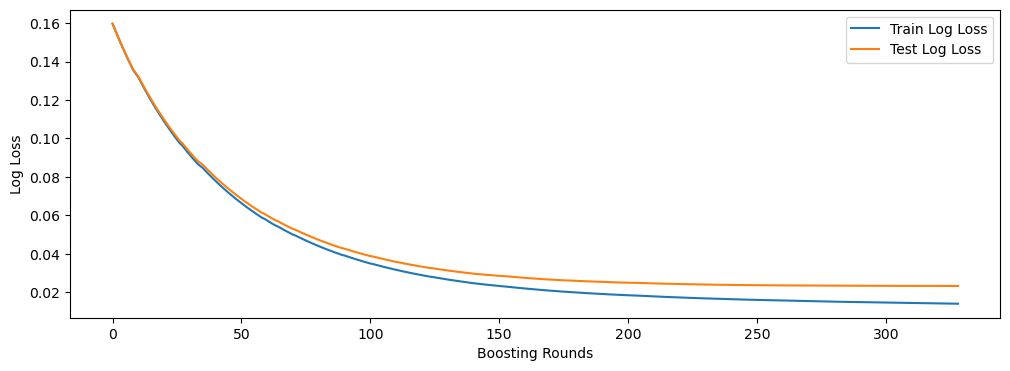

Best iteration (round): 328


In [116]:
import xgboost as xgb
import pandas as pd

# Prepare your DMatrix
dtrain = xgb.DMatrix(x_train, y_train, missing=np.nan)

params = {'booster':'gbtree', 'objective':'binary:logistic', 'max_depth':9, 'eval_metric':'logloss',
          'eta':0.02, 'nthread':4, 'subsample': 0.9, 'colsample_bytree':0.9, 'scale_pos_weight': 1,
          'min_child_weight':3, 'max_delta_step':3}
num_rounds = 400

params['seed'] = 42 # 0.85533

# Number of rounds for training

# Perform K-Fold Cross Validation (e.g., 5-fold)
cv_results = xgb.cv(
    params=params, 
    dtrain=dtrain, 
    num_boost_round=num_rounds, 
    nfold=10,  # Specify the number of folds
    early_stopping_rounds=50,  # Stops after 50 rounds without improvement
    metrics='logloss',  # Evaluation metric
    as_pandas=True,  # Return results as a pandas DataFrame
    seed=42  # Set seed for reproducibility
)

# Show the cross-validation results
print(cv_results)

# Plot the results (if needed)
import matplotlib.pyplot as plt
plt.plot(cv_results['train-logloss-mean'], label='Train Log Loss')
plt.plot(cv_results['test-logloss-mean'], label='Test Log Loss')
plt.xlabel('Boosting Rounds')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

# You can now use the results for model selection, e.g., select the best round
best_iteration = cv_results['test-logloss-mean'].idxmin()
print(f"Best iteration (round): {best_iteration}")



Feature Importance (Ascending Order):
                                      Feature  Importance
23           Salary_Account_Bank of Rajasthan    0.000000
69        Salary_Account_United Bank of India    0.000000
25        Salary_Account_Catholic Syrian Bank    0.000000
26       Salary_Account_Central Bank of India    0.000000
65  Salary_Account_Tamil Nadu Mercantile Bank    0.000000
..                                        ...         ...
6                                        Var5    0.017375
2                         Loan_Amount_Applied    0.019405
4                                Existing_EMI    0.029505
1                              Monthly_Income    0.063474
10                                   LoggedIn    0.789537

[99 rows x 2 columns]




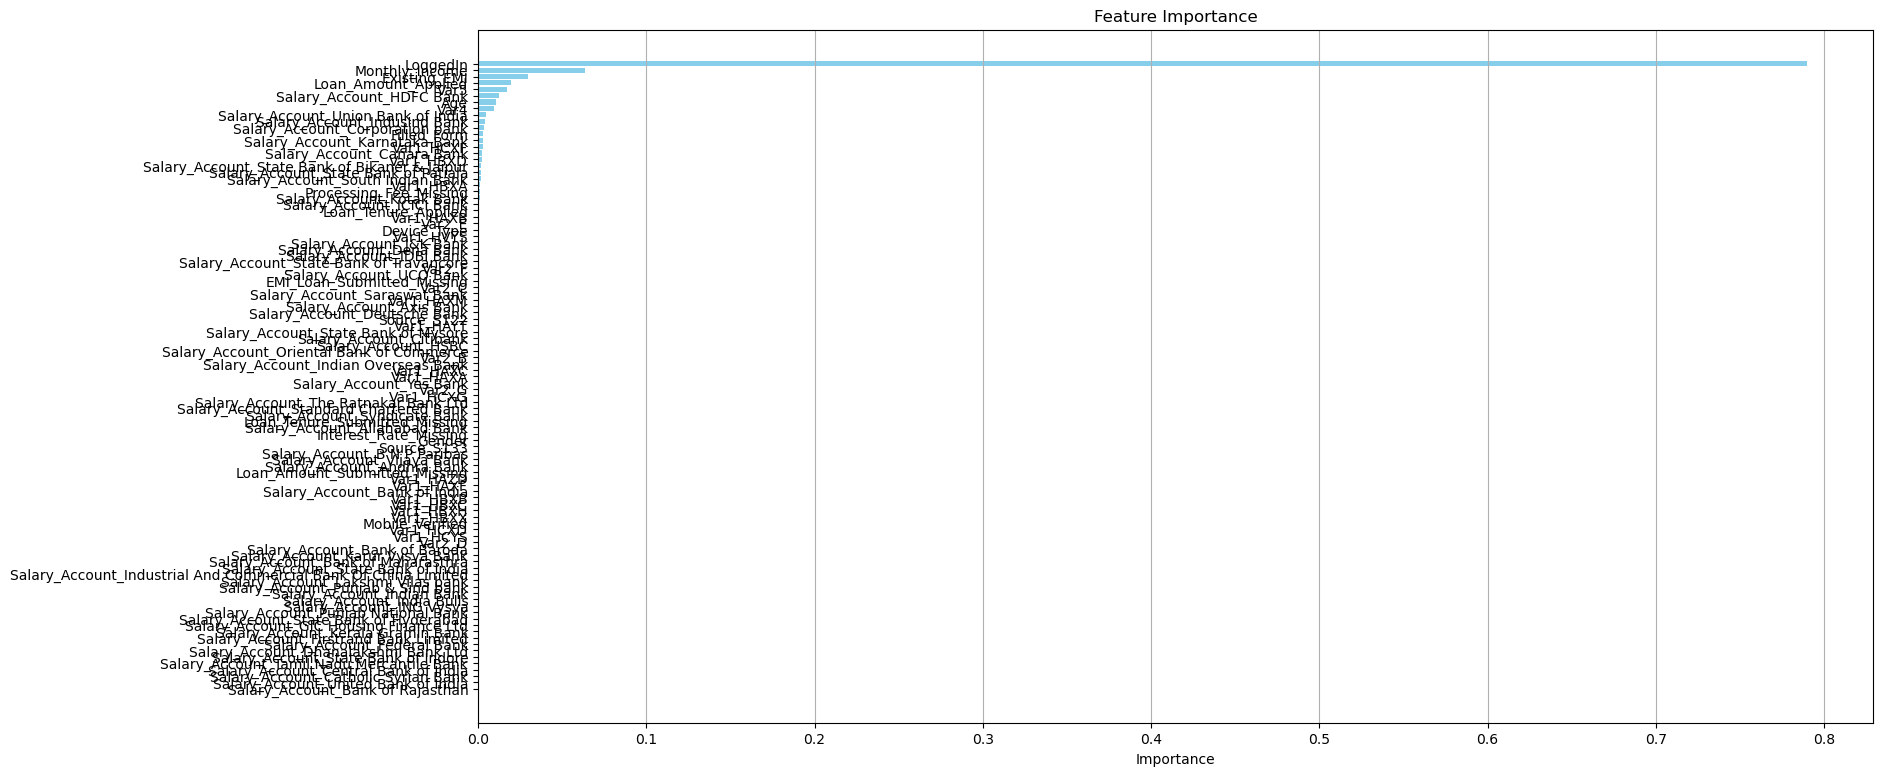

In [117]:
importance = gbm0.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': importance})

feature_importance_df.sort_values(by='Importance', ascending=True, inplace=True)



print("\nFeature Importance (Ascending Order):")

print(feature_importance_df)



print('\n')

# Plot feature importance

plt.figure(figsize=(18, 9))

plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')

plt.xlabel('Importance')

plt.title('Feature Importance')

plt.grid(axis='x')

plt.show()

In [118]:
not_imp_feature = feature_importance_df['Feature'][:23].tolist()


In [119]:
new_data = train.drop(not_imp_feature,axis =1)

In [121]:
new_x = new_data.drop('Disbursed' , axis = 1)
new_y = new_data['Disbursed']

In [123]:
#### Creating datatset with Dependent and indepent varaibles


x_train_new, x_test_new, y_train_new, y_test_mew = train_test_split(new_x, new_y, test_size=0.3, random_state=10,stratify=new_y)

In [125]:
## fitting a base gbm model

gbm0 = GradientBoostingClassifier(random_state=10) ## initialising base gbm model

gbm0.fit(x_train_new, y_train_new)

GradientBoostingClassifier(random_state=10)

In [126]:
#### Write your code here


y_pred_train_new = gbm0.predict(x_train_new)

y_pred_test_new = gbm0.predict(x_test_new)

accuracy_train_new = accuracy_score(y_train, y_pred_train_new)

accuracy_test_new = accuracy_score(y_test, y_pred_test_new)

roc_auc_score_train_new = roc_auc_score(y_train, y_pred_train_new)

roc_auc_score_test_new = roc_auc_score(y_test, y_pred_test_new)



print(f'Accuracy for train data : {accuracy_train_new}')

print(f'Accuracy for test data : {accuracy_test_new}')



print(f'roc_auc_score for train data : {roc_auc_score_train_new}')

print(f'roc_auc_score for test data : {roc_auc_score_test_new}')


Accuracy for train data : 0.9693338148865613
Accuracy for test data : 0.9703516433003907
roc_auc_score for train data : 0.49796042473747004
roc_auc_score for test data : 0.498809881443027


In [129]:
### Write your answer here



best_n_estimators = gsearch1.best_params_['n_estimators']

param_grid = {

    'max_depth': list(range(5, 16, 2)),  # 5, 7, 9, 11, 13, 15

    'min_samples_split': list(range(200, 1001, 200))  # 200, 400, 600, 800, 1000

}



gsearch2 = GridSearchCV(

    estimator=GradientBoostingClassifier(n_estimators=best_n_estimators, random_state=10),

    param_grid=param_grid,

    scoring='roc_auc',

    cv=5,

    n_jobs=-1,

    verbose=1

)

gsearch2.fit(x_train_new,y_train_new)

best_params_gsearch2 = gsearch2.best_params_

best_score_gsearch2 = gsearch2.best_score_



print(f"Best Parameters from gsearch2: {best_params_gsearch2}")

print(f"Best AUC Score from gsearch2: {best_score_gsearch2:.4f}") 

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters from gsearch2: {'max_depth': 5, 'min_samples_split': 1000}
Best AUC Score from gsearch2: 0.9912


In [130]:
## Tuning the Model with best max depth from above and varying

## (i)min_samples_split':range(1000,2100,200),

## (i)'min_samples_leaf':range(30,71,10)



param_test3 = {'min_samples_split':np.arange(1000,2100,200), 'min_samples_leaf':np.arange(30,71,10)}

gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=gsearch1.best_params_['n_estimators'],max_depth=gsearch2.best_params_['max_depth'],max_features='sqrt', subsample=0.8, random_state=10),

param_grid = param_test3, scoring='roc_auc',n_jobs=4, cv=5)

gsearch3.fit(x_train_new,y_train_new)

gsearch3.best_params_, gsearch3.best_score_

({'min_samples_leaf': 40, 'min_samples_split': 2000}, 0.9906001712538199)

In [131]:
best_min_samples_split = gsearch3.best_params_['min_samples_split']

best_min_samples_leaf = gsearch3.best_params_['min_samples_leaf']



# (iv) Tuning the model with max_features

param_test4 = {'max_features': np.arange(7, 20, 2)}  # 7, 9, 11, 13, 15, 17, 19

gsearch4 = GridSearchCV(

    estimator=GradientBoostingClassifier(

        learning_rate=0.1,

        n_estimators=gsearch1.best_params_['n_estimators'],

        max_depth=gsearch2.best_params_['max_depth'],

        min_samples_split=best_min_samples_split,

        min_samples_leaf=best_min_samples_leaf,

        subsample=0.8,  # default value; will be tuned later

        random_state=10

    ),

    param_grid=param_test4,

    scoring='roc_auc',

    n_jobs=-1,

    cv=5,

    verbose=1

)

gsearch4.fit(x_train_new, y_train_new)



best_params_gsearch4 = gsearch4.best_params_

best_score_gsearch4 = gsearch4.best_score_



print(f"Best Parameters from gsearch4: {best_params_gsearch4}")

print(f"Best AUC Score from gsearch4: {best_score_gsearch4:.4f}")

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Parameters from gsearch4: {'max_features': 15}
Best AUC Score from gsearch4: 0.9922


In [132]:
param_test5 = {'subsample': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9]}  # Subsample values

gsearch5 = GridSearchCV(

    estimator=GradientBoostingClassifier(

        learning_rate=0.1,

        n_estimators=gsearch1.best_params_['n_estimators'],

        max_depth=gsearch2.best_params_['max_depth'],

        min_samples_split=best_min_samples_split,

        min_samples_leaf=best_min_samples_leaf,

        max_features=gsearch4.best_params_['max_features'],  # Use best max_features

        random_state=10

    ),

    param_grid=param_test5,

    scoring='roc_auc',

    n_jobs= -1,

    cv=5,

    verbose=1

)

gsearch5.fit(x_train_new, y_train_new)



best_params_gsearch5 = gsearch5.best_params_

best_score_gsearch5 = gsearch5.best_score_



print(f"Best Parameters from gsearch5: {best_params_gsearch5}")

print(f"Best AUC Score from gsearch5: {best_score_gsearch5:.4f}")

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters from gsearch5: {'subsample': 0.8}
Best AUC Score from gsearch5: 0.9922


In [133]:
best_subsample = gsearch5.best_params_['subsample']



#(i) Model 1: Learning rate 0.05 with twice the number of trees

gbm_tuned1 = GradientBoostingClassifier(

    learning_rate=0.05,

    n_estimators=gsearch1.best_params_['n_estimators'] * 2,  # double the trees

    max_depth=gsearch2.best_params_['max_depth'],

    min_samples_split=gsearch3.best_params_['min_samples_split'],

    min_samples_leaf=gsearch3.best_params_['min_samples_leaf'],

    max_features=gsearch4.best_params_['max_features'],

    subsample=best_subsample,

    random_state=10

)



#(ii) Model 2: Learning rate 0.02 with ten times the number of trees

gbm_tuned2 = GradientBoostingClassifier(

    learning_rate=0.02,

    n_estimators=gsearch1.best_params_['n_estimators'] * 10,  # ten times the trees

    max_depth=gsearch2.best_params_['max_depth'],

    min_samples_split=gsearch3.best_params_['min_samples_split'],

    min_samples_leaf=gsearch3.best_params_['min_samples_leaf'],

    max_features=gsearch4.best_params_['max_features'],

    subsample=best_subsample,

    random_state=10

)



# (iii) Model 3: Learning rate 0.005 with twenty times the number of trees

gbm_tuned3 = GradientBoostingClassifier(

    learning_rate=0.005,

    n_estimators=gsearch1.best_params_['n_estimators'] * 20,  # twenty times the trees

    max_depth=gsearch2.best_params_['max_depth'],

    min_samples_split=gsearch3.best_params_['min_samples_split'],

    min_samples_leaf=gsearch3.best_params_['min_samples_leaf'],

    max_features=gsearch4.best_params_['max_features'],

    subsample=best_subsample,

    random_state=10

)



# List to hold models and their AUC scores

models = [gbm_tuned1, gbm_tuned2, gbm_tuned3]

model_names = ['gbm_tuned1', 'gbm_tuned2', 'gbm_tuned3']

auc_scores = []



# (iv) Evaluate models using cross-validation

for model in models:

    cv_scores = cross_val_score(model, x_train, y_train, scoring='roc_auc', cv=5)

    mean_auc = np.mean(cv_scores)

    auc_scores.append(mean_auc)

    print(f"{model_names.pop(0)}: Mean AUC = {mean_auc:.4f}")



# Select the model with the least average AUC

best_model_index = np.argmin(auc_scores)

best_model = models[best_model_index]

best_model_name = f"gbm_tuned{best_model_index + 1}"



print(f"\nSelected Model: {best_model_name} with Mean AUC = {auc_scores[best_model_index]:.4f}")



# (v) Score the selected model on the test data

best_model.fit(x_train, y_train)

y_test_pred_prob = best_model.predict_proba(x_test)[:, 1]  # Assuming x_test is your test dataset

test_auc = roc_auc_score(y_test, y_test_pred_prob)  # Assuming y_test is your test labels



print(f"Test AUC for {best_model_name}: {test_auc:.4f}")


gbm_tuned1: Mean AUC = 0.9920
gbm_tuned2: Mean AUC = 0.9922
gbm_tuned3: Mean AUC = 0.9922

Selected Model: gbm_tuned1 with Mean AUC = 0.9920
Test AUC for gbm_tuned1: 0.9919


In [134]:
train.columns

Index(['Gender', 'Monthly_Income', 'Loan_Amount_Applied',
       'Loan_Tenure_Applied', 'Existing_EMI', 'Mobile_Verified', 'Var5',
       'Filled_Form', 'Device_Type', 'Var4', 'LoggedIn', 'Disbursed', 'Age',
       'EMI_Loan_Submitted_Missing', 'Interest_Rate_Missing',
       'Loan_Amount_Submitted_Missing', 'Loan_Tenure_Submitted_Missing',
       'Salary_Account_Allahabad Bank', 'Salary_Account_Andhra Bank',
       'Salary_Account_Axis Bank', 'Salary_Account_B N P Paribas',
       'Salary_Account_Bank of Baroda', 'Salary_Account_Bank of India',
       'Salary_Account_Bank of Maharasthra',
       'Salary_Account_Bank of Rajasthan', 'Salary_Account_Canara Bank',
       'Salary_Account_Catholic Syrian Bank',
       'Salary_Account_Central Bank of India', 'Salary_Account_Citibank',
       'Salary_Account_Corporation bank', 'Salary_Account_Dena Bank',
       'Salary_Account_Deutsche Bank', 'Salary_Account_Dhanalakshmi Bank Ltd',
       'Salary_Account_Federal Bank', 'Salary_Account_Firstra